<p align="center">
 <img src="http://www.di.uoa.gr/themes/corporate_lite/logo_el.png" title="Department of Informatics and Telecommunications - University of Athens"/> </p>

---
<h1 align="center"> 
  Artificial Intelligence
</h1>
<h1 align="center" > 
  Deep Learning for Natural Language Processing
</h1>

---
<h2 align="center"> 
 <b>Konstantinos Nikoletos</b>
</h2>

<h3 align="center"> 
 <b>Winter 2020-2021</b>
</h3>


---
---


<h3 align="center"> 
 <b>Task Description</b>
</h3>

Implement gradient descent, stochastic gradient descent and mini-batch gradient descent
for ridge regression in the toolkit [Scikit-Learn](https://scikit-learn.org/stable/).
Use the California Housing Dataset subset available in this link to demonstrate your
algorithms. Use appropriate visualization techniques like the ones we presented in the
lectures to demonstrate how well your implementations perform on this dataset (more
specifically that they are not underfitting or overfitting). Start by reading chapter 2 of the book [“Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow”](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

---
---

__Import__ of libraries and housing dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
houses = fetch_california_housing()


# __California Housing dataset__ information
---
In this section I introduce myself in the dataset by viewing the raw data of it.


### __Dataset preview__

In [ ]:
housesDf = pd.DataFrame(houses.data,columns=houses.feature_names)
housesDf['Target'] = houses.target
housesDf

MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  Target
0      8.3252      41.0  6.984127  ...     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25   3.422
...       ...       ...       ...  ...       ...        ...     ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09   0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21   0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22   0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32   0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24   0.894

[20640 rows x 9 columns]

__Some interesting plots to examine our dataset__

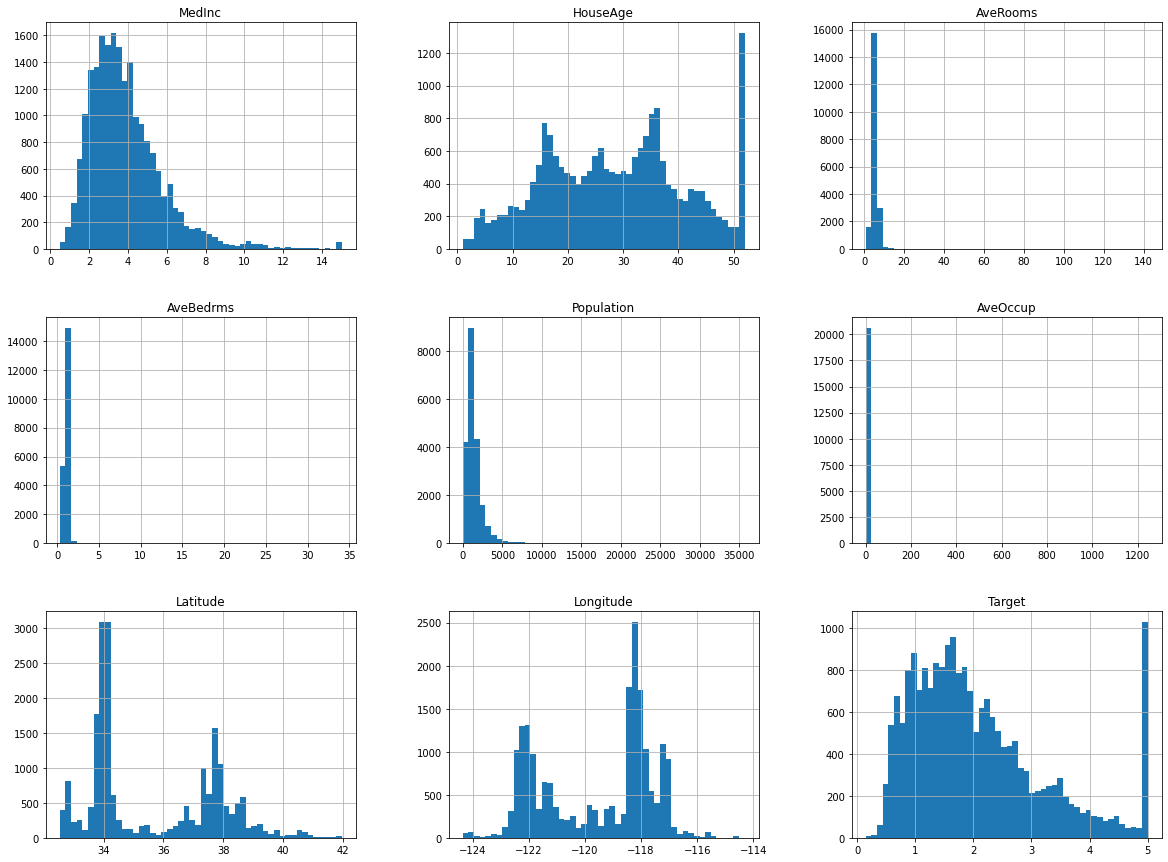

In [ ]:
#Plotting histograms for various features
housesDf.hist(bins=50, figsize=(20,15))
plt.show()

Checking correlations between features by plotting a heatmap

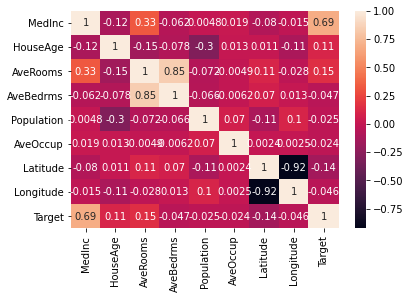

In [ ]:
import seaborn as sns

sns.heatmap(housesDf.corr(),annot=True)

We notice a strong correlation between MedInc and the Target

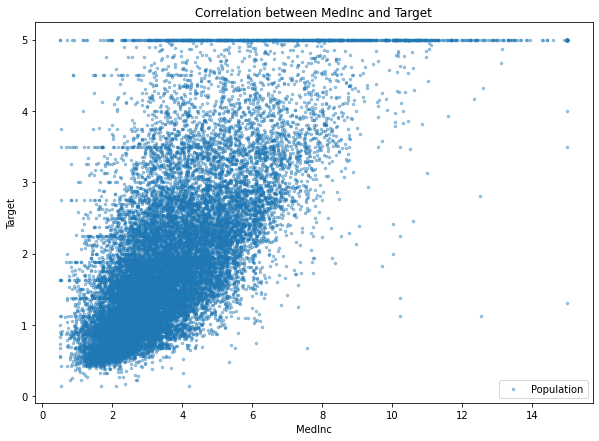

In [ ]:
housesDf.plot(kind="scatter", x="MedInc", y="Target", alpha=0.4,
s=6, label="Population", figsize=(10,7),title='Correlation between MedInc and Target')
plt.legend()

Data is quite sparse, but we can still observe some linearity.

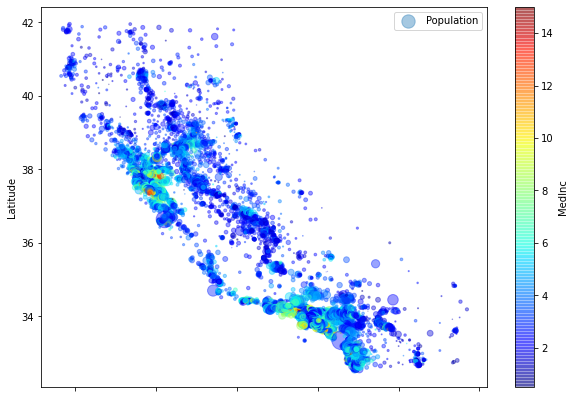

In [ ]:
housesDf.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=housesDf["Population"]/100, label="Population", figsize=(10,7),
c="MedInc", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

__Checking for Null values:__  
No null values to our dataframe as 0 nulls in all columns

In [ ]:
 housesDf.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

## __Data preparation__
---


#### Scaling data using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_housesDf = sc.fit_transform(housesDf)
target = scaled_housesDf[:,8]
data = scaled_housesDf[:,0:8]

#### Train-test split:


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=25)

# Reshaping y_train and y_test to 2d array
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

# Gradient descent
---
__Gradient descent__ is an optimization technique used for computing the model parameters (coefficients and bias) for algorithms like linear regression, logistic regression, neural networks, etc. In this technique, we repeatedly iterate through the training set and update the model parameters in accordance with the gradient of error with respect to the training set.

We have 3-types of gradient descents:

* __Batch Gradient Descent:__ Parameters are updated after computing the gradient of error with respect to the entire training set
* __Stochastic Gradient Descent:__ Parameters are updated after computing the gradient of error with respect to a single training example
* __Mini-Batch Gradient Descent:__ Parameters are updated after computing the gradient of error with respect to a subset of the training set

Comparing these types

| Batch Gradient Descent  |  Stochastic Gradient Descent | Mini-Batch Gradient Descent  |
|---|---|---|
| Since entire training data is considered before taking a step in the direction of gradient, therefore it takes a lot of time for making a single update.  | Since only a single training example is considered before taking a step in the direction of gradient, we are forced to loop over the training set and thus cannot exploit the speed associated with vectorizing the code.  | Since a subset of training examples is considered, it can make quick updates in the model parameters and can also exploit the speed associated with vectorizing the code.  |
| It makes smooth updates in the model parameters  | It makes very noisy updates in the parameters  | Depending upon the batch size, the updates can be made less noisy – greater the batch size less noisy is the update  |

Also, Mini-batch gradient descent makes a compromise between the speedy convergence and the noise associated with gradient update which makes it a more flexible and robust algorithm

## Algorithms and execution
----

__Usefull functions__ common to all gradient descent algorithms for __Linear Regression__

In [ ]:
# function to compute gradient of error
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = (2/X.shape[0])*np.dot(X.T, (np.dot(X, theta) - y)) 
    return grad 
  
# function to compute MSE
def cost(X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0]

def predict(X,theta):
    return np.dot(X, theta[0:8]) + theta[8]


In [ ]:
plt.style.use('seaborn-whitegrid') # plot style

### Custom grid search function


In [ ]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import cross_validate,KFold

# Using kfold for the cross validation
kf = KFold(n_splits=5)

# MUST BE EXECUTED AFTER GRADIENT DESCENT CLASSES
def GridSearch(gradientDescent,data,target,X_train, y_train,X_test, y_test, learning_rates_list, epochs, batches):
    
    mse_list = []

    # if no batches
    if (len(batches)==0):
        batches.append("-")

    # grid search loop
    for b in batches:
        for lr in learning_rates_list:
            if (batches[0]=="-"):
                bgd = gradientDescent(lr ,epochs)
                bgd.fit(X_train, y_train)
                theta, error_list = bgd.get_fit_result()
                plot_list = bgd.get_plot_list()
            else:
                bgd = gradientDescent(lr ,epochs, b)
                bgd.fit(X_train, y_train)
                theta, error_list = bgd.get_fit_result()
                plot_list = bgd.get_plot_list()
                
            # prediction for the test set
            prediction = predict(X_test,theta)

            # printing usefull data
            print("------------------------------------------------------------------------------------")
            print("\nLEARNING RATE: ",lr)
            print("MAX_ITERATIONS: ",epochs)
            if(gradientDescent == MiniBatchGradientDescent):
                print("BATCH_SIZE: ",b)
            print("Prediction and scores for X_test")
            print("MSE: ",mean_squared_error(y_test,prediction))
            print("R2: ",r2_score(y_test,prediction))
            print("Bias = ", theta[8]) 
            print("Plots\n") 

            f = plt.figure(figsize=(10,10))
            plt.subplots_adjust( wspace=0.5, hspace=0.5)    
            
            # First plot - Number of iterations and their affect to MSE
            title = 'Learning rate = '+ str(lr)
            plt.title(title)
            ax1 = plt.subplot(222)
            ax1.plot(range(0,epochs,1),error_list, color = 'blue',label='#Iterations')
            ax1.set_xlabel("Number of iterations") 
            ax1.set_ylabel("MSE") 
            ax1.set_title('MSE per Number of iterations')
            
            # Second plot is the evaluation of regression at training steps
            ax2 = plt.subplot(221)
            ax2.set_ylim([-2,4])
            ax2.set_xlim([-3,7])
            ax2.scatter(X_test[:,0],y_test, color = 'blue',alpha = 0.3,label='MedInc vs target',s=5) 
            ax2.plot(X_test[:,0],prediction, color = 'green',alpha = 0.3,label = 'Prediction area')
            
            if(gradientDescent == StochasticGradientDescent ):
                num_lines = len(y_train)*epochs
                line_range = range(0,num_lines,int(num_lines/100))
            elif(gradientDescent == MiniBatchGradientDescent ):
                num_lines = int(len(y_train)/b)*epochs
                line_range = range(0,num_lines,int(num_lines/100))
            else:
                line_range = range(epochs)
                
            for p in line_range:
                ax2.plot([plot_list[p][0],plot_list[p][1]] , [plot_list[p][2],plot_list[p][3]] ,color = 'r',alpha = 0.15)            
            ax2.set_title('Linear regression while training')
            ax2.set_xlabel("Prediction / True label") 
            ax2.set_ylabel("MedInc")
            legend = ax2.legend(shadow=True,loc='upper right',frameon=True)
            
            # Third plot depicts the linear regression at the test set, and the area that was checked from the algorithm
            ax3 = plt.subplot(212)
            ax3.scatter(X_test[:,0],y_test, color = 'blue',alpha = 0.3,label='MedInc vs target',s=5) 
            ax3.plot(X_test[:,0],prediction, color = 'green',alpha = 0.4,label='Prediction area')
            ax3.plot([min(X_test[:,0]), max(X_test[:,0])], [min(prediction), max(prediction)], color = 'r', lw = 3,label = 'Linear regression') 
            ax3.set_title('Prediction on test set')
            ax3.set_xlabel("Prediction") 
            ax3.set_ylabel("MedInc")
            legend = ax3.legend(shadow=True,loc='upper right',frameon=True)
            
            plt.show()
            
            # Doing a cross validation
            print('\nCROSS-VALIDATION')
            scores = cross_validate(bgd, data, target, cv=kf ,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
            print('TEST_R2: ',scores['test_r2'])
            print('TRAIN_R2: ',scores['train_r2'],"\n")
            print('TEST_MSE: ',-scores['test_neg_mean_squared_error'])
            print('TRAIN_MSE: ',-scores['train_neg_mean_squared_error'],"\n")
            Learning_Curves(bgd,data,target,kf)
            
            print("------------------------------------------------------------------------------------")        

### __Learning curves__ 
Are a widely used diagnostic tool in machine learning for algorithms such as deep learning that learn incrementally. During training time, we evaluate model performance on both the training and hold-out validation dataset and we plot this performance for each training step (i.e. each epoch of a deep learning model or tree for an ensembled tree model). Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative. 

__Learning_Curves(model,X,y,cv)__ Function that produses two sublpots with 2 learning curves (MSE and R2 scoring)




In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def Learning_Curves(model,X,y,cv):

    train_sizes=np.linspace(.05, 1.0, 5)
  
    fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, constrained_layout=True,figsize=(10,5))

    # Mse learning curves
    mse_train_sizes, mse_train_scores, mse_validation_scores = learning_curve(estimator = model,X = X,y =y, cv = cv,train_sizes = train_sizes,n_jobs=4,scoring = 'neg_mean_squared_error')
    
    # R2 learning curves
    r2_train_sizes, r2_train_scores, r2_validation_scores = learning_curve(estimator = model,X = X,y =y, cv = cv,train_sizes = train_sizes,n_jobs=4,scoring = 'r2')    

    # Calculating mean of the returned vectors 
    mse_train_scores_mean = np.mean(-mse_train_scores,axis=1)
    mse_validation_scores_mean = np.mean(-mse_validation_scores,axis=1)
    r2_train_scores_mean = np.mean(r2_train_scores,axis=1)
    r2_validation_scores_mean = np.mean(r2_validation_scores,axis=1)

    # MSE plot
    ax1.plot(mse_train_sizes, mse_train_scores_mean,'o-', label = 'Training error',color='b')
    ax1.plot(mse_train_sizes, mse_validation_scores_mean,'o-', label = 'Validation error',color='r')
    ax1.set_ylabel('MSE')
    ax1.set_xlabel('Training set size')
    ax1.set_title('Learning curves for MSE',y = 1.03)
    ax1.legend(loc="best")

    # R2 plot
    ax2.plot(r2_train_sizes, r2_train_scores_mean, 'o-', color="r",label="Training score")
    ax2.plot(r2_train_sizes, r2_validation_scores_mean, 'o-', color="b",label="Cross-validation score")
    ax2.set_ylabel('R2')
    ax2.set_xlabel('Training set size')
    ax2.set_title('Learning curves for R2',y = 1.03)
    ax2.legend(loc="best")


    plt.show()


### __Batch gradient descent__
---
Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function (MSE)

In [ ]:
class BatchGradientDescent():
    
    def __init__(self, learning_rate=0.1, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
        
    def fit(self,X, y):
        X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
        theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
        error_list = []
        plot_list = []
        
        for s in range(self.iterations):
            prediction = np.dot(X,theta)
            gradient = (2/X.shape[0])*np.dot(X.T, (prediction - y)) 
            theta = theta - self.learning_rate * gradient
            error_list.append(cost(X, y, theta)) #useful for plotting changes when using different batch sizes
            plot_list.append((min(X[:,0]), max(X[:,0]),min(prediction), max(prediction)))
                                                                    
        self.theta,self.error_list = theta,error_list
        self.plot_list = plot_list
        
    def predict(self,X):
        return np.dot(X, self.theta[0:8]) + self.theta[8]
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def get_plot_list(self):
        return self.plot_list
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
    
    def get_fit_result(self):
        return self.theta,self.error_list

#### Searching algorithm bahaviour for multiple parameters

------------------------------------------------------------------------------------

LEARNING RATE:  0.0001
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.9317093890273719
R2:  0.04119819779845335
Bias =  [-7.72054191e-05]
Plots



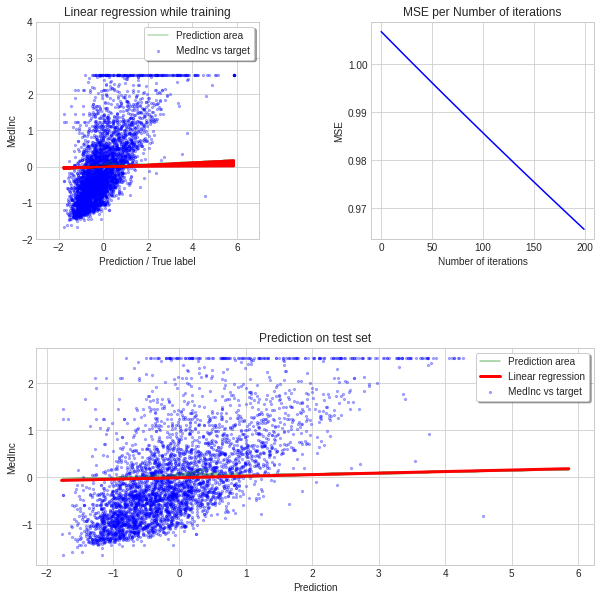


CROSS-VALIDATION
TEST_R2:  [-0.09121813  0.02588128 -0.01880851 -0.01641296  0.01569059]
TRAIN_R2:  [0.03378462 0.04164091 0.03501458 0.04471301 0.03720408] 

TEST_MSE:  [0.88037633 0.85634577 1.10066231 0.89552744 1.07716161]
TRAIN_MSE:  [0.97919083 0.98324214 0.92615124 0.97142714 0.93179941] 



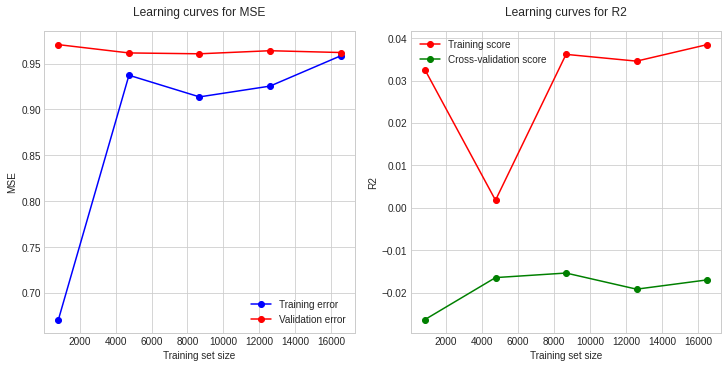

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.6901778474076531
R2:  0.289753037022791
Bias =  [-0.0007768]
Plots



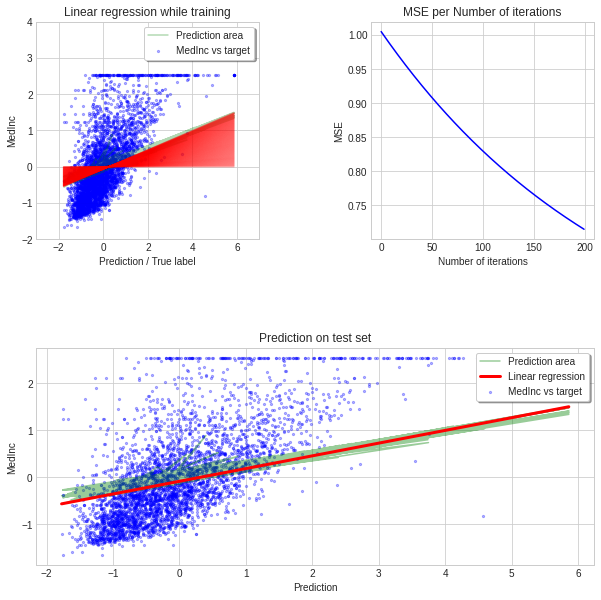


CROSS-VALIDATION
TEST_R2:  [0.19523382 0.26361511 0.23466121 0.15833642 0.26938101]
TRAIN_R2:  [0.27833972 0.30084096 0.27629241 0.31815151 0.2737049 ] 

TEST_MSE:  [0.64927174 0.64735444 0.82682815 0.74156161 0.79953998]
TRAIN_MSE:  [0.73135156 0.71731216 0.69458321 0.69336873 0.70291256] 



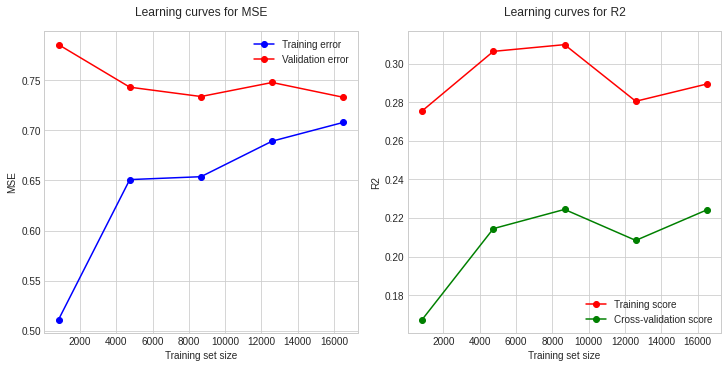

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.43650743139121784
R2:  0.5507997270166265
Bias =  [-0.00392464]
Plots



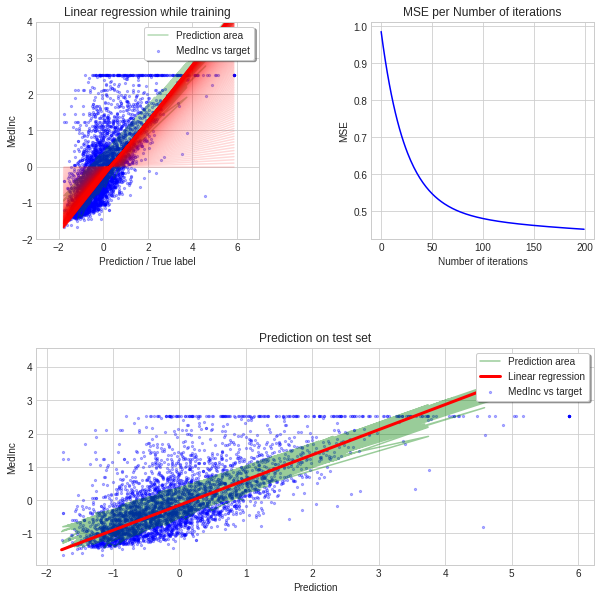


CROSS-VALIDATION
TEST_R2:  [0.51891961 0.42089963 0.51594256 0.40881097 0.57768345]
TRAIN_R2:  [0.53534942 0.58267436 0.55163526 0.56468806 0.52964421] 

TEST_MSE:  [0.38812752 0.50908594 0.5229479  0.52087686 0.46215465]
TRAIN_MSE:  [0.47089044 0.42816118 0.43032106 0.44266679 0.45521303] 



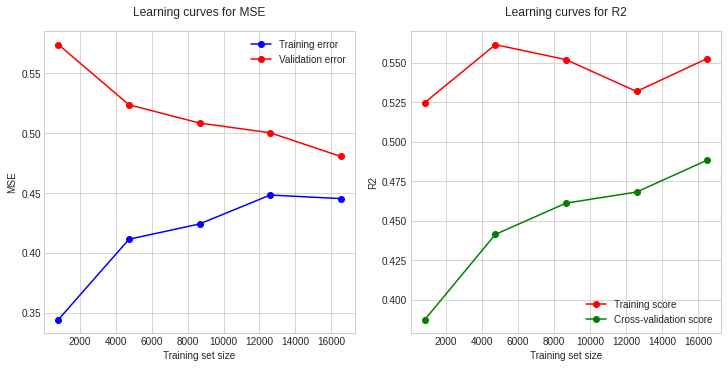

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.3957342805421259
R2:  0.5927584868788138
Bias =  [-0.00216804]
Plots



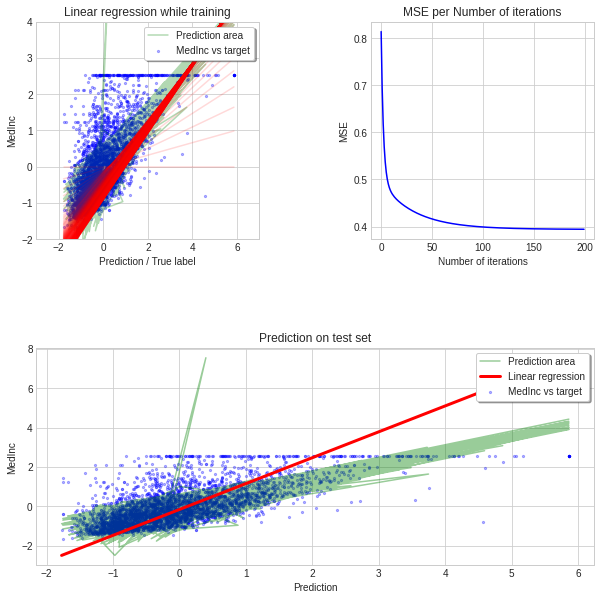


CROSS-VALIDATION
TEST_R2:  [0.55480248 0.46806067 0.55168988 0.5335383  0.65686216]
TRAIN_R2:  [0.59560969 0.63315598 0.61062629 0.61029725 0.58356155] 

TEST_MSE:  [0.35917782 0.46762677 0.48432855 0.41098379 0.37550683]
TRAIN_MSE:  [0.40982093 0.37636884 0.37370403 0.39628701 0.40303152] 



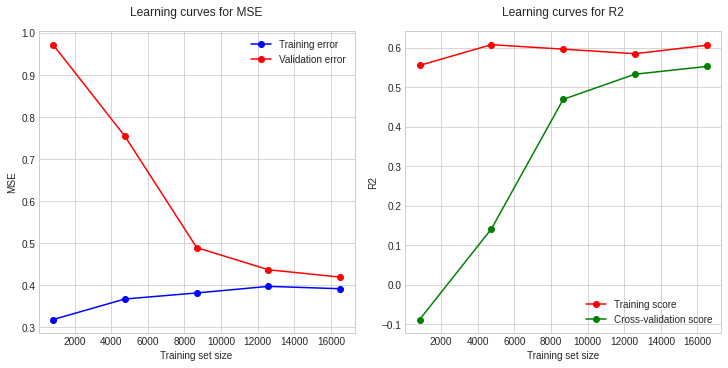

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.3964895701644831
R2:  0.5919812348089853
Bias =  [-0.00199611]
Plots



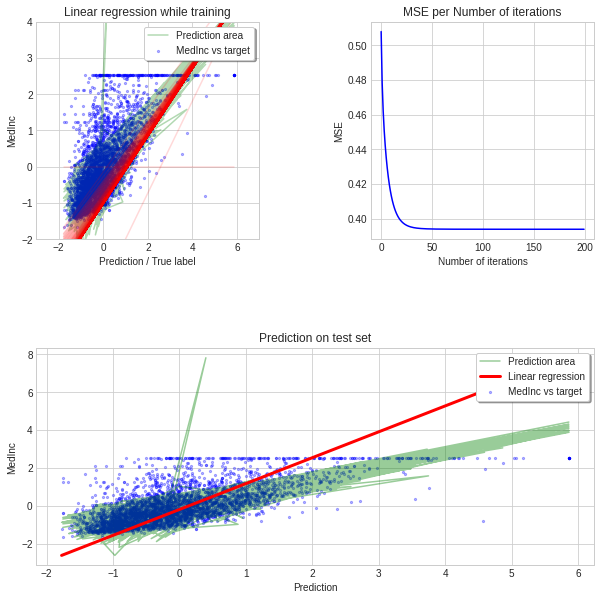


CROSS-VALIDATION
TEST_R2:  [ 5.48664018e-01 -8.14323823e+45 -9.54535175e+06 -1.60939157e+22
 -4.50904439e+38]
TRAIN_R2:  [ 5.96103679e-01 -3.03167901e+46 -1.24438257e+07 -2.22867245e+22
 -1.51341853e+39] 

TEST_MSE:  [3.64130235e-01 7.15870399e+45 1.03122519e+07 1.41798104e+22
 4.93439302e+38]
TRAIN_MSE:  [4.09320304e-01 3.11039420e+46 1.19430462e+07 2.26632721e+22
 1.46469512e+39] 



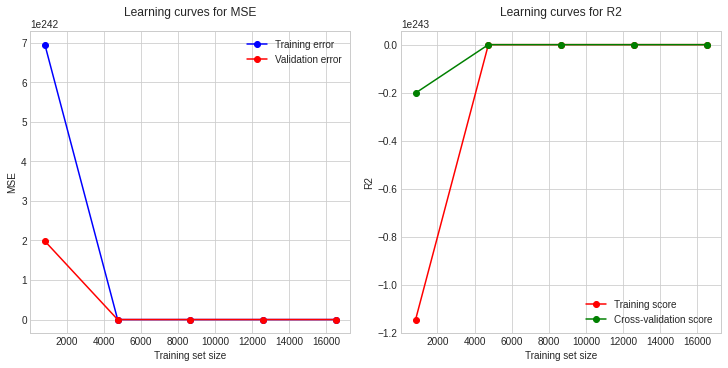

------------------------------------------------------------------------------------


In [ ]:
learning_rates_list = [0.0001,0.001,0.01,0.1,0.5]
epochs = 200
GridSearch(BatchGradientDescent,data,target.reshape(-1,1),X_train, y_train,X_test, y_test,learning_rates_list,epochs,[])

#### Batch gradient descent __remarks__

* __Overfitting__

 I notice overfitting occur when learning rate is 0.5. This happens as result of big regularization of the data, as this learning rate is too big. Algorithm has almost converged but the algorithm still is being executing and the result is overfitting. 

* __Underfitting__

 I notice underfitting occur when learning rate is bellow 0.01. This happens as result of big regularization of the data, as this learning rate is too small. Looking at learning curves I see that validation error remains high and plateau very fast. Getting more data won't help, but decreasing learning rate will help as it is shown from the data. Except from the learning curves we can notice overfitting from the other plots (regression lines and area that the algorithm predicted) and also from the cross validation scores that are very bad.

* __Good fit__

 Good fit to the data when learning rate is 0.01 and 0.1 as the learning curves approach each other to a lower MSE.


### __Stochastic gradient descent__
---
Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance.

In [ ]:
class StochasticGradientDescent():
    
    def __init__(self, learning_rate=0.1, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
        
    def fit(self,X, y):
        X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
        theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
        error_list = []
        plot_list = []
        m = len(y)

        for s in range(self.iterations):
            sum_cost = 0.0 # variable for computing average cost per epoch
            for i in range(m):
                randint = np.random.randint(0,m)  # random integer
                X_Stochastic = X[randint,:].reshape(1,X.shape[1])   # random line from the dataset
                y_Stochastic = y[randint].reshape(1,1)  # and its target from y set
                eta = learning_schedule(s*m+i)
                prediction = X_Stochastic.dot(theta)
                gradient = 2*X_Stochastic.T.dot(prediction-y_Stochastic)
                theta = theta - eta * gradient
                sum_cost += cost(X_Stochastic, y_Stochastic, theta) # sum of costs to find the mean of the epoch
                plot_list.append((min(X_Stochastic[:,0]), max(X_Stochastic[:,0]),min(prediction), max(prediction))) # regression line data
            error_list.append(sum_cost/m)
                
        self.theta,self.error_list = theta,error_list
        self.plot_list = plot_list

        
    def get_plot_list(self):
        return self.plot_list
        
    def predict(self,X):
        return np.dot(X, self.theta[0:8]) + self.theta[8]
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
    
    def get_fit_result(self):
        return self.theta,self.error_list
    
t0 , t1 = 5 , 50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

#### Searching algorithm bahaviour for multiple parameters

------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  100
Prediction and scores for X_test
MSE:  0.39799094971382687
R2:  0.5904361978750954
Bias =  [-0.00396287]
Plots



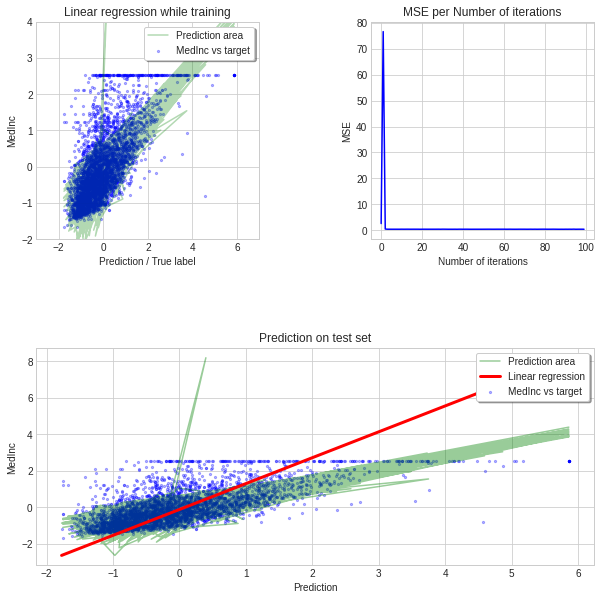


CROSS-VALIDATION
TEST_R2:  [0.54684919 0.46751892 0.54893983 0.53939036 0.65998638]
TRAIN_R2:  [0.59405954 0.63326221 0.6108884  0.61033112 0.58421862] 

TEST_MSE:  [0.36559441 0.46810303 0.48729955 0.40582773 0.37208789]
TRAIN_MSE:  [0.41139189 0.37625985 0.37345247 0.39625257 0.4023956 ] 



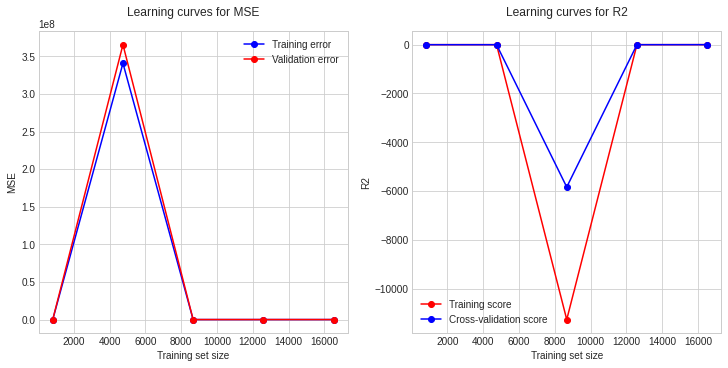

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  100
Prediction and scores for X_test
MSE:  143358.87925517946
R2:  -147526.49452804096
Bias =  [-3.37297085]
Plots



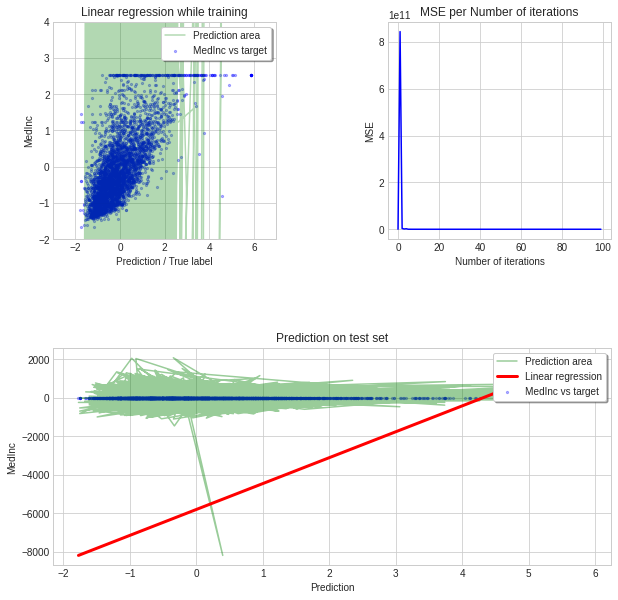


CROSS-VALIDATION
TEST_R2:  [ 5.48102198e-01 -7.29657858e+02  5.50398144e-01  3.92111271e-01
  6.63218512e-01]
TRAIN_R2:  [ 5.96059214e-01 -9.57729732e+02  6.10905812e-01  5.18647564e-01
  5.84305835e-01] 

TEST_MSE:  [3.64583503e-01 6.42319821e+02 4.85724070e-01 5.35590411e-01
 3.68550869e-01]
TRAIN_MSE:  [4.09365366e-01 9.83622407e+02 3.73435758e-01 4.89485174e-01
 4.02311194e-01] 



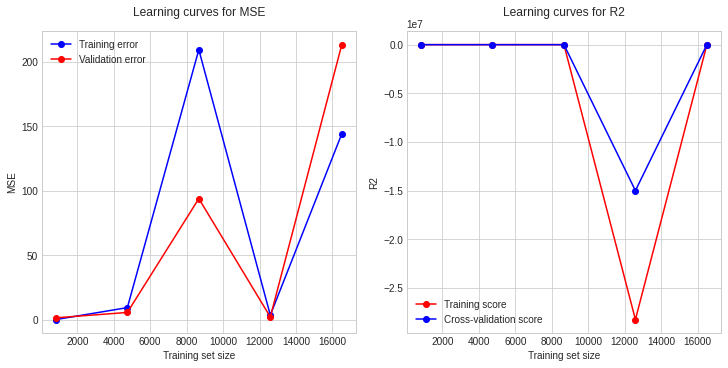

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  100
Prediction and scores for X_test
MSE:  0.39927546828918087
R2:  0.5891143278375974
Bias =  [-0.00348424]
Plots



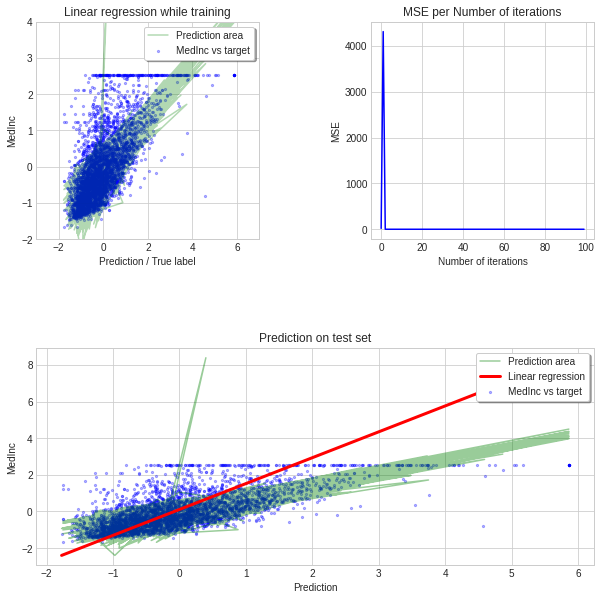


CROSS-VALIDATION
TEST_R2:  [ 5.46725639e-01  4.66594925e-01 -1.17643953e+07  3.51874272e-01
  6.59584923e-01]
TRAIN_R2:  [ 5.96057974e-01  6.33030565e-01 -1.26661397e+07  3.02672860e-01
  5.84096754e-01] 

TEST_MSE:  [3.65694087e-01 4.68915305e-01 1.27095794e+07 5.71041884e-01
 3.72527222e-01]
TRAIN_MSE:  [4.09366622e-01 3.76497512e-01 1.21564135e+07 7.09108901e-01
 4.02513544e-01] 



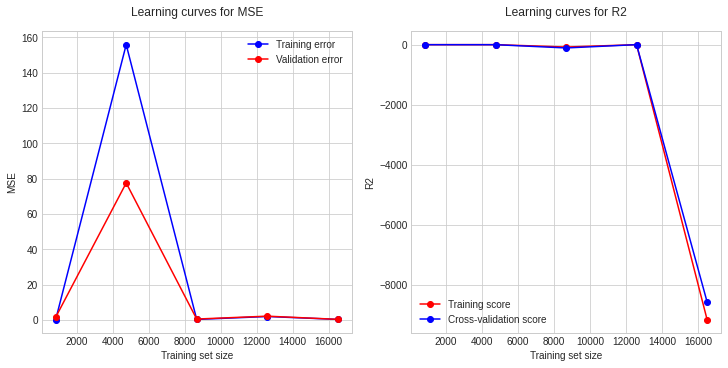

------------------------------------------------------------------------------------


In [ ]:
learning_rates_list = [0.001,0.01,0.1]
epochs = 100 # not 200 because of time executing
GridSearch(StochasticGradientDescent,data,target.reshape(-1,1),X_train, y_train,X_test, y_test,learning_rates_list,epochs,[])

#### Stochastic gradient descent __remarks__

Learning curves of stochastic gradient descent are not so illustrative because of the randomness of the algorithm,so:

* __Overfitting__

  Occurs when iterations are more than 100 when stochastic GD don't converge to the minima but instead goes around, searching for this, even though I have used a learning schedule.

* __Underfitting__

 Underrfitting occurs when stochastic GD has trainned under 10.000 samples and this is a result of picking randomly each training sample seperately.

* __Good fit__

 Good scores are achieved for learning rate 0.1 but still we can see from the learning curves the unstability of the algorithm.

 ****Strange behaviour for learning rate equal to 0.01***




### Mini-batch gradient descent
---
Mini-batch Gradient
Descent. At each step, instead of computing the gradients based on the full training
set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch
GD computes the gradients on small random sets of instances called minibatches.

In [ ]:
from sklearn.utils import shuffle

class MiniBatchGradientDescent():
    
    def __init__(self, learning_rate=0.1, iterations=100, batch_size = 10):
        self.learning_rate, self.iterations, self.batch_size = learning_rate, iterations, batch_size
        
    def fit(self,X, y):
        X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
        theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
        error_list = []
        plot_list = []
        m = len(y)

        for s in range(self.iterations):
            sum_cost = 0.0
            indices = np.random.permutation(len(y))   # random generator of a serie of indices from len(y)
            X = X[indices]
            y = y[indices]
            
            for i in range(0, m, self.batch_size):
                X_i = X[i:i+self.batch_size]  # taking a batch of them
                y_i = y[i:i+self.batch_size]
                prediction = X_i.dot(theta)
                gradient = (2/m)*(X_i.T.dot(prediction-y_i))
                theta = theta - self.learning_rate * gradient
                sum_cost += cost(X_i, y_i, theta)
                plot_list.append((min(X_i[:,0]), max(X_i[:,0]),min(prediction), max(prediction)))
                
            error_list.append(sum_cost/int(m/self.batch_size)) 
            
        self.theta,self.error_list = theta,error_list
        self.plot_list = plot_list

    def get_plot_list(self):
        return self.plot_list

    def predict(self,X):
        return np.dot(X, self.theta[0:8]) + self.theta[8]
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
    
    def get_fit_result(self):
        return self.theta,self.error_list

#### Searching algorithm bahaviour for multiple parameters

------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.6903617071503804
R2:  0.289563830973399
Bias =  [-0.00077674]
Plots



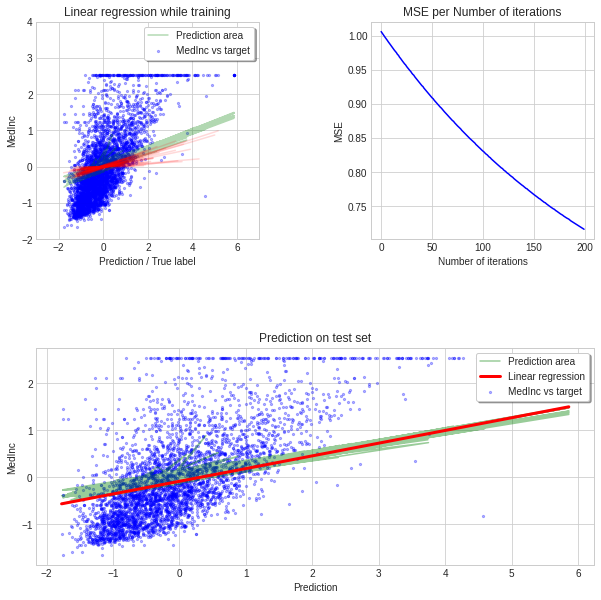


CROSS-VALIDATION
TEST_R2:  [0.19501882 0.26343779 0.23447571 0.15824587 0.26919349]
TRAIN_R2:  [0.27815245 0.30064709 0.27611509 0.31793126 0.27352762] 

TEST_MSE:  [0.6494452  0.64751032 0.82702855 0.74164139 0.79974519]
TRAIN_MSE:  [0.73154134 0.71751106 0.6947534  0.6935927  0.70308413] 



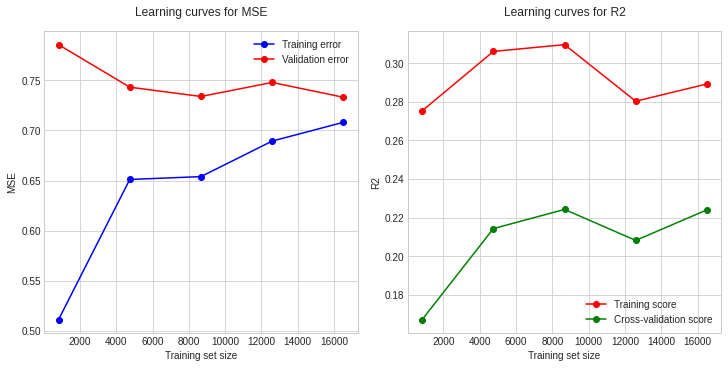

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.4365507438894593
R2:  0.5507551550697717
Bias =  [-0.0039173]
Plots



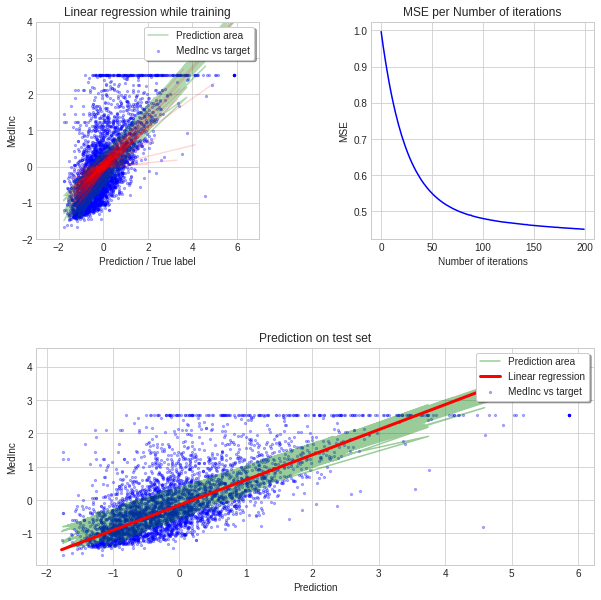


CROSS-VALIDATION
TEST_R2:  [0.51887257 0.42098066 0.51590343 0.40859752 0.57762215]
TRAIN_R2:  [0.53530514 0.58262387 0.55158256 0.56465269 0.52959965] 

TEST_MSE:  [0.38816547 0.50901471 0.52299018 0.52106493 0.46222173]
TRAIN_MSE:  [0.47093531 0.42821298 0.43037165 0.44270277 0.45525615] 



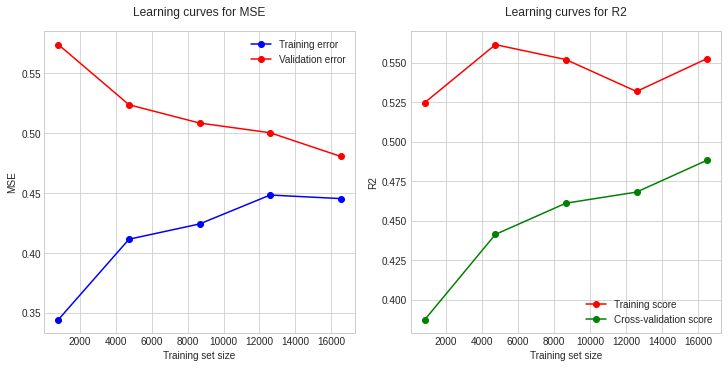

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.39567033416151065
R2:  0.5928242927037849
Bias =  [-0.00222726]
Plots



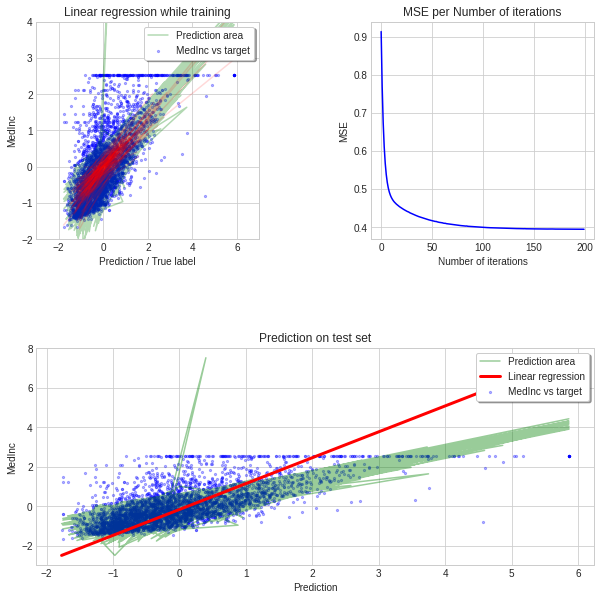


CROSS-VALIDATION
TEST_R2:  [0.55488214 0.46787604 0.55182311 0.53321861 0.65737118]
TRAIN_R2:  [0.59559281 0.63314957 0.61061337 0.61028593 0.58353982] 

TEST_MSE:  [0.35911356 0.46778908 0.48418462 0.41126546 0.37494979]
TRAIN_MSE:  [0.40983803 0.37637542 0.37371643 0.39629852 0.40305255] 



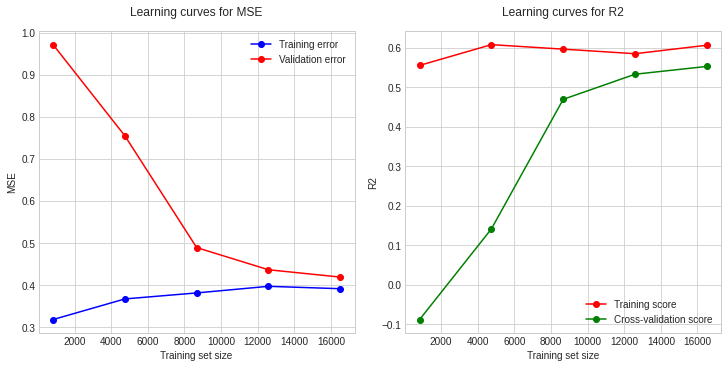

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.39477366266544706
R2:  0.5937470377748697
Bias =  [-0.00317492]
Plots



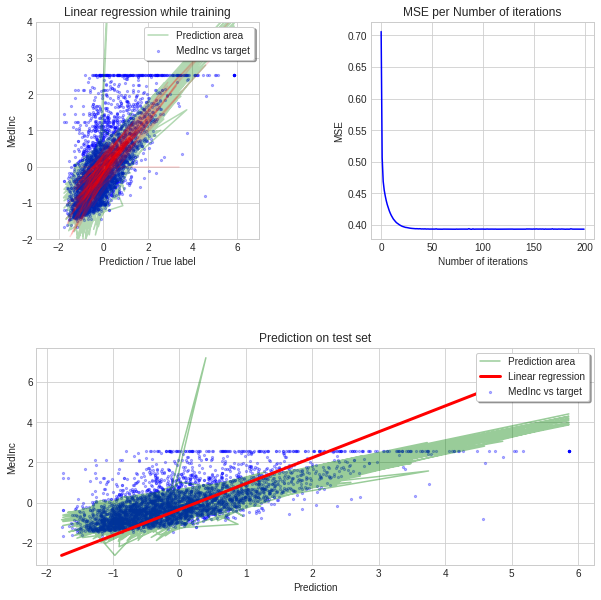


CROSS-VALIDATION
TEST_R2:  [0.55211813 0.46738753 0.55297696 0.53674887 0.66271406]
TRAIN_R2:  [0.59607158 0.63317494 0.61062654 0.61007808 0.58394341] 

TEST_MSE:  [0.36134351 0.46821853 0.48293807 0.40815506 0.3691029 ]
TRAIN_MSE:  [0.40935283 0.37634939 0.3737038  0.39650989 0.40266195] 



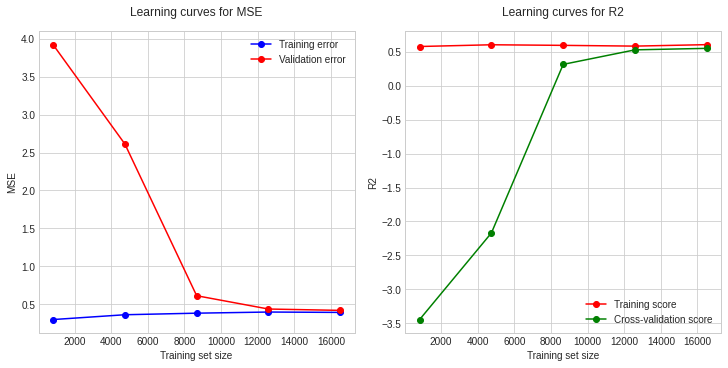

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.6903614839629671
R2:  0.28956406065069595
Bias =  [-0.00077663]
Plots



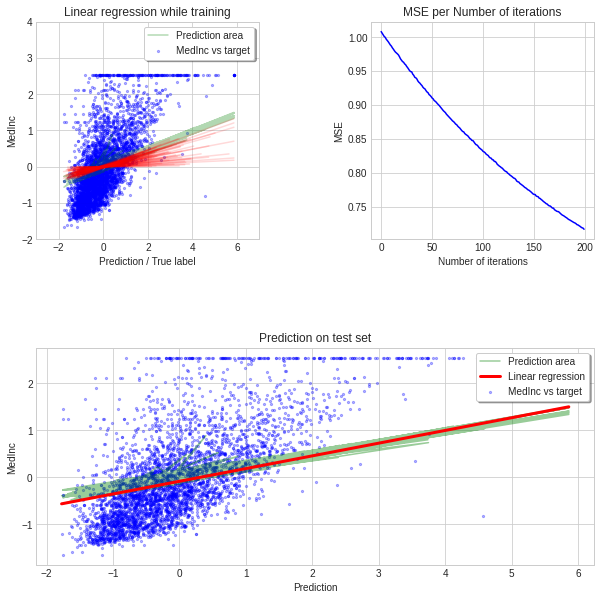


CROSS-VALIDATION
TEST_R2:  [0.19501883 0.26343777 0.23447573 0.15824581 0.26919351]
TRAIN_R2:  [0.27815248 0.30064708 0.27611508 0.31793115 0.27352766] 

TEST_MSE:  [0.64944519 0.64751034 0.82702854 0.74164144 0.79974517]
TRAIN_MSE:  [0.73154131 0.71751108 0.69475341 0.69359281 0.70308409] 



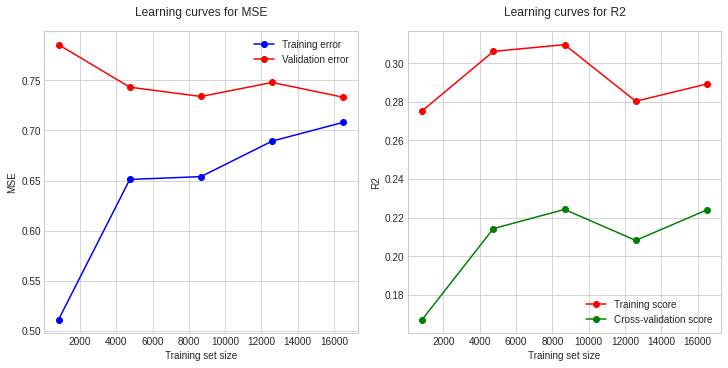

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.4365508072211138
R2:  0.550755089896548
Bias =  [-0.00391155]
Plots



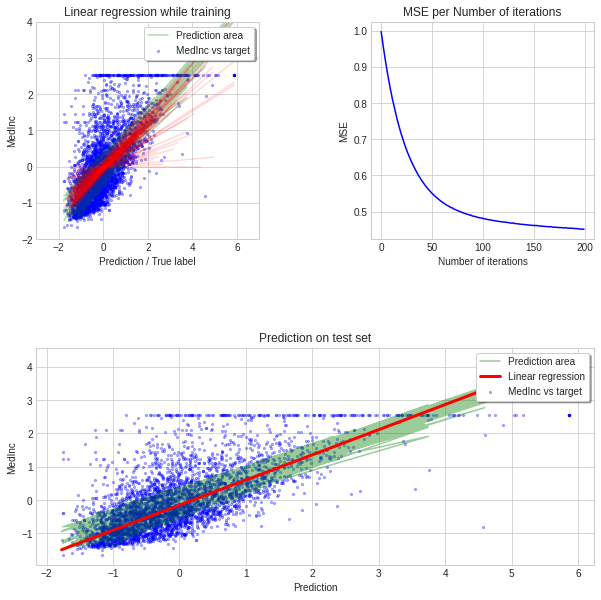


CROSS-VALIDATION
TEST_R2:  [0.51886544 0.42097821 0.51590405 0.40859291 0.57762174]
TRAIN_R2:  [0.53530522 0.58262361 0.55158291 0.56465278 0.52959919] 

TEST_MSE:  [0.38817122 0.50901686 0.52298951 0.52106899 0.46222218]
TRAIN_MSE:  [0.47093524 0.42821325 0.43037131 0.44270268 0.45525659] 



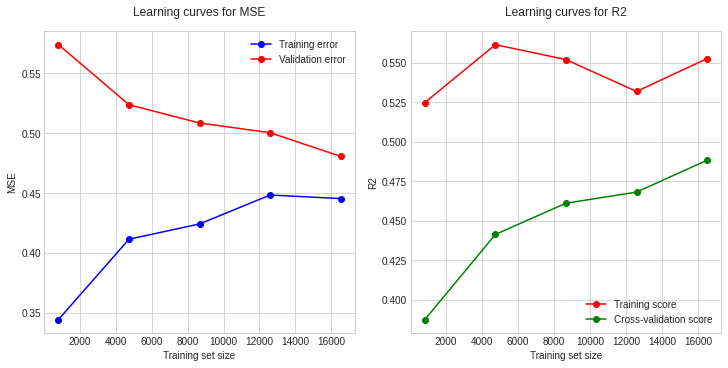

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.39597175384496924
R2:  0.5925141082845629
Bias =  [-0.00215423]
Plots



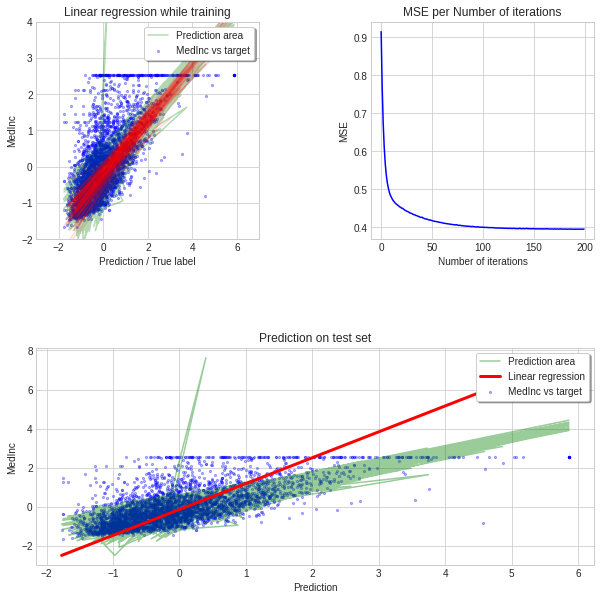


CROSS-VALIDATION
TEST_R2:  [0.55503125 0.46786411 0.5516717  0.53297173 0.65739349]
TRAIN_R2:  [0.59559376 0.63314427 0.61061246 0.61028662 0.58354325] 

TEST_MSE:  [0.35899326 0.46779957 0.48434819 0.41148297 0.37492538]
TRAIN_MSE:  [0.40983707 0.37638085 0.3737173  0.39629782 0.40304923] 



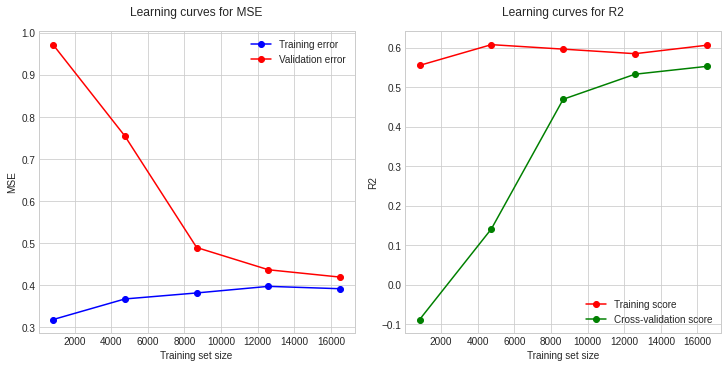

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.39687791256201194
R2:  0.5915816001213811
Bias =  [-0.00016867]
Plots



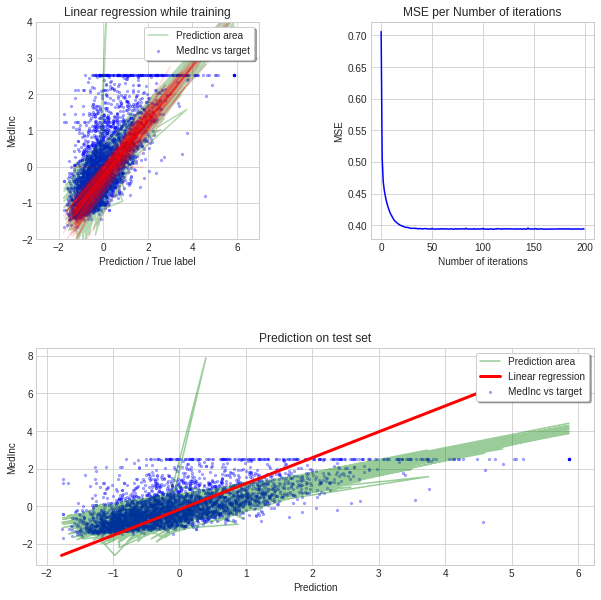


CROSS-VALIDATION
TEST_R2:  [0.54807094 0.46703118 0.55367338 0.53609152 0.66320262]
TRAIN_R2:  [0.5960825  0.63327942 0.61068747 0.61056077 0.5844027 ] 

TEST_MSE:  [0.36460872 0.46853179 0.4821857  0.40873424 0.36856826]
TRAIN_MSE:  [0.40934177 0.37624219 0.37364531 0.39601903 0.40221745] 



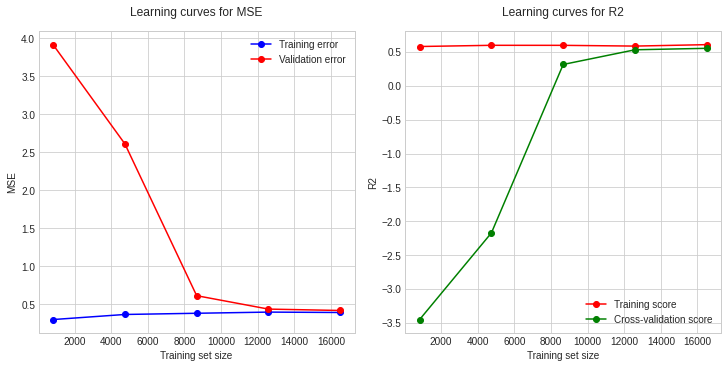

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.6903613363639922
R2:  0.2895642125415805
Bias =  [-0.0007767]
Plots



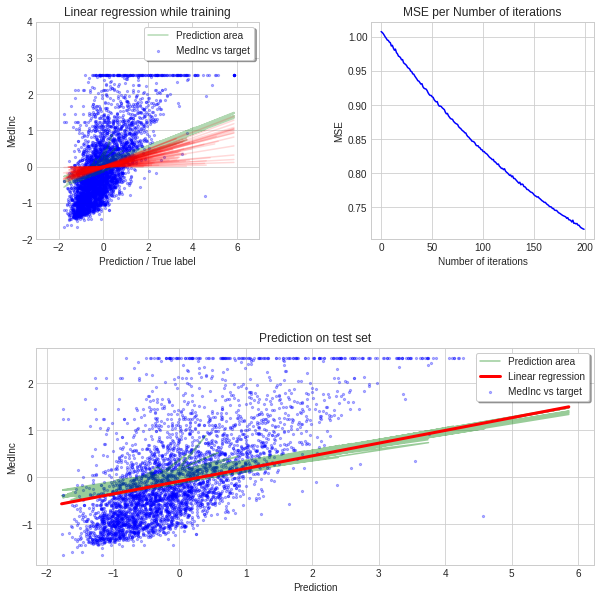


CROSS-VALIDATION
TEST_R2:  [0.19501894 0.26343781 0.23447568 0.15824568 0.26919359]
TRAIN_R2:  [0.27815257 0.3006471  0.27611514 0.31793115 0.27352775] 

TEST_MSE:  [0.6494451  0.64751031 0.82702859 0.74164156 0.79974508]
TRAIN_MSE:  [0.73154122 0.71751106 0.69475335 0.69359281 0.70308401] 



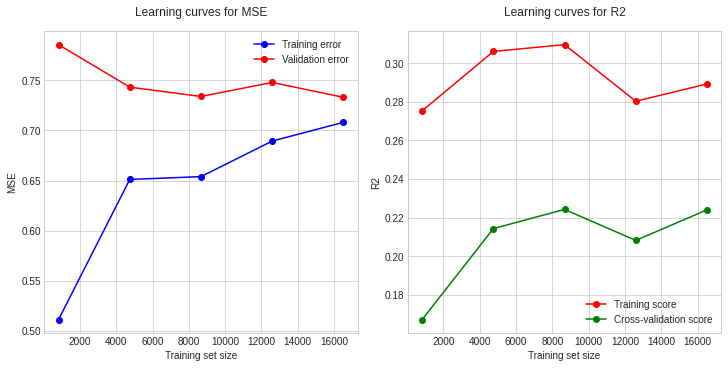

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.43655119332000397
R2:  0.5507546925706048
Bias =  [-0.00392046]
Plots



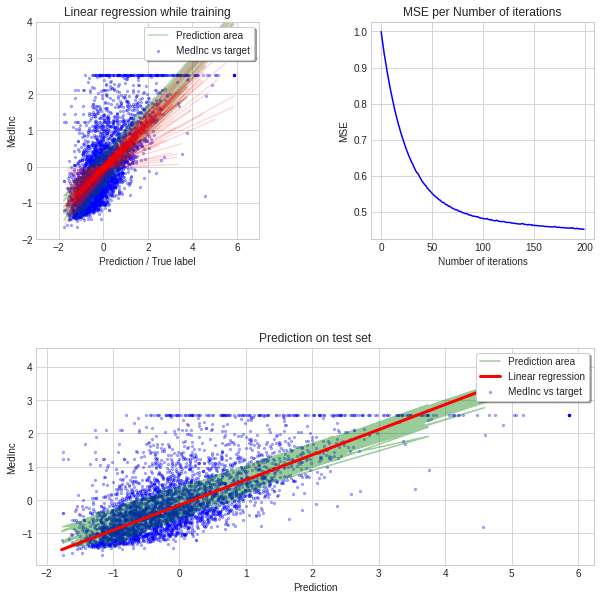


CROSS-VALIDATION
TEST_R2:  [0.51886129 0.42098087 0.51590763 0.4085975  0.57761933]
TRAIN_R2:  [0.53530522 0.5826237  0.55158259 0.56465274 0.52959911] 

TEST_MSE:  [0.38817457 0.50901453 0.52298564 0.52106495 0.46222482]
TRAIN_MSE:  [0.47093523 0.42821315 0.43037162 0.44270271 0.45525667] 



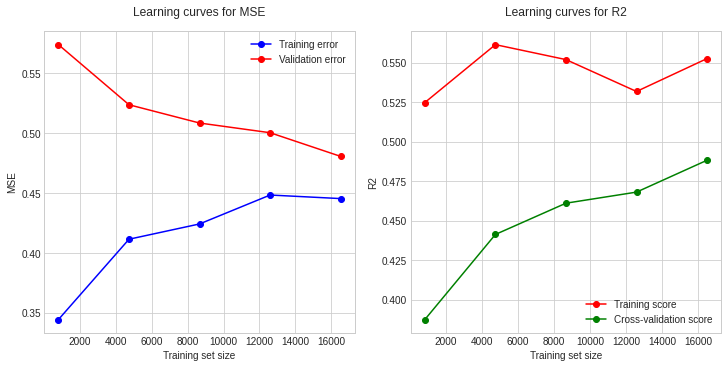

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.3955996899524535
R2:  0.5928969911178578
Bias =  [-0.00208792]
Plots



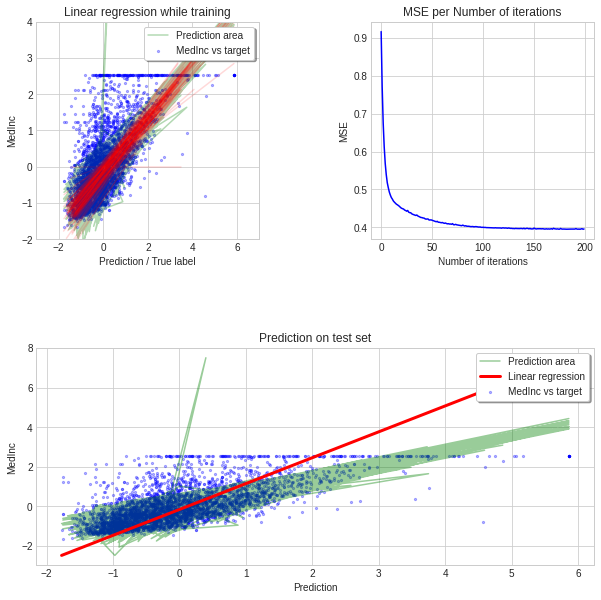


CROSS-VALIDATION
TEST_R2:  [0.55492175 0.46784126 0.55189717 0.53332756 0.65738214]
TRAIN_R2:  [0.59559271 0.63314748 0.61061229 0.61028107 0.58354336] 

TEST_MSE:  [0.3590816  0.46781965 0.4841046  0.41116947 0.3749378 ]
TRAIN_MSE:  [0.40983814 0.37637757 0.37371747 0.39630346 0.40304913] 



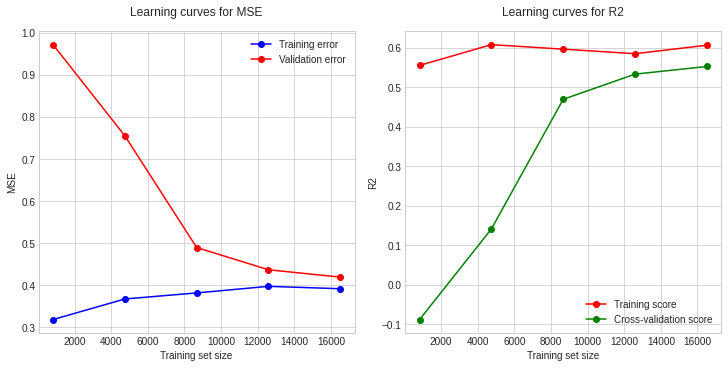

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.3959479874251178
R2:  0.592538565788645
Bias =  [-0.00205492]
Plots



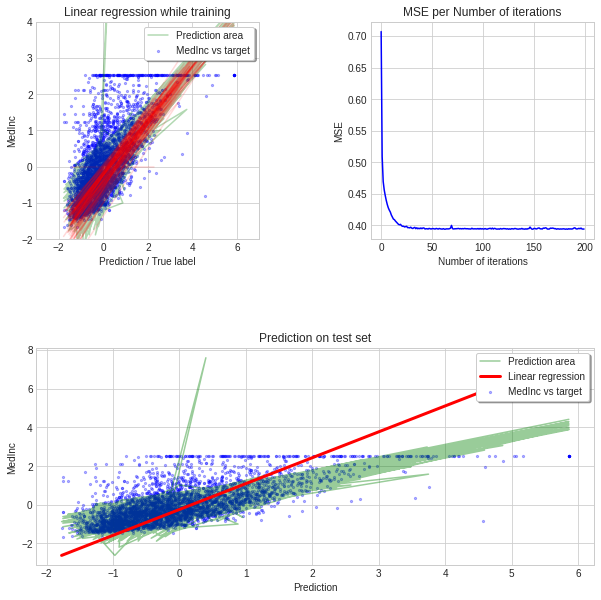


CROSS-VALIDATION
TEST_R2:  [0.54703583 0.46753139 0.55181933 0.53637643 0.66297751]
TRAIN_R2:  [0.59609231 0.63329045 0.61088703 0.6105081  0.58376416] 

TEST_MSE:  [0.36544383 0.46809206 0.4841887  0.4084832  0.36881461]
TRAIN_MSE:  [0.40933182 0.37623088 0.37345378 0.3960726  0.40283543] 



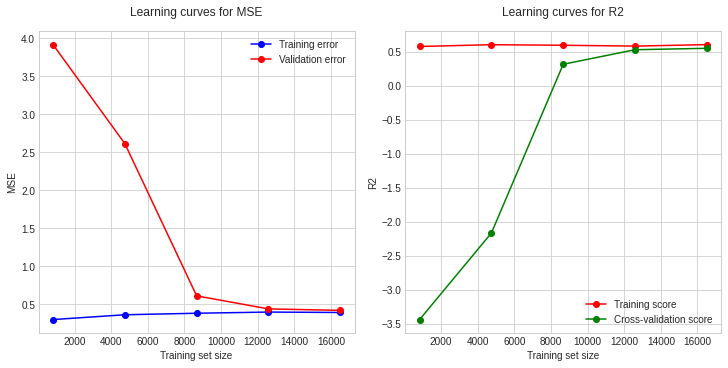

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.6903607187073743
R2:  0.2895648481585287
Bias =  [-0.00077668]
Plots



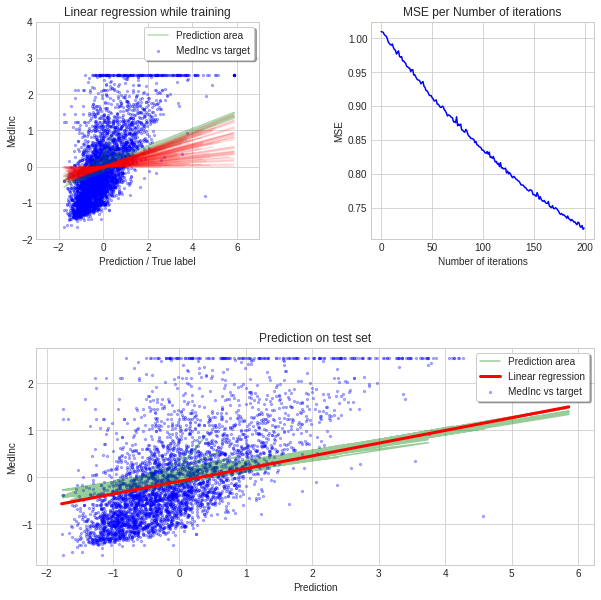


CROSS-VALIDATION
TEST_R2:  [0.19501873 0.26343786 0.23447547 0.15824564 0.26919369]
TRAIN_R2:  [0.2781524  0.30064712 0.27611484 0.31793103 0.27352787] 

TEST_MSE:  [0.64944527 0.64751026 0.82702882 0.74164159 0.79974496]
TRAIN_MSE:  [0.7315414  0.71751103 0.69475364 0.69359294 0.70308389] 



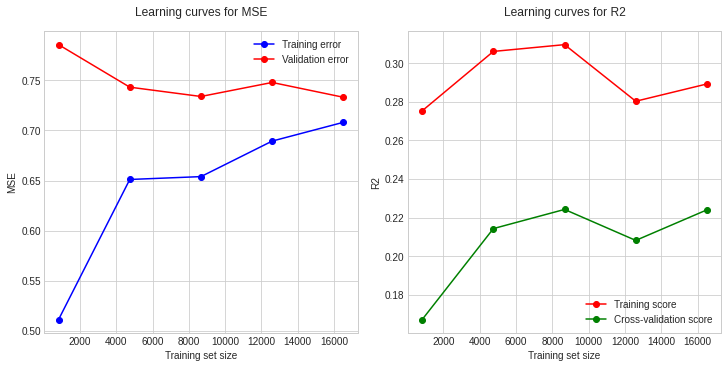

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.4365506062474669
R2:  0.5507552967141427
Bias =  [-0.00391648]
Plots



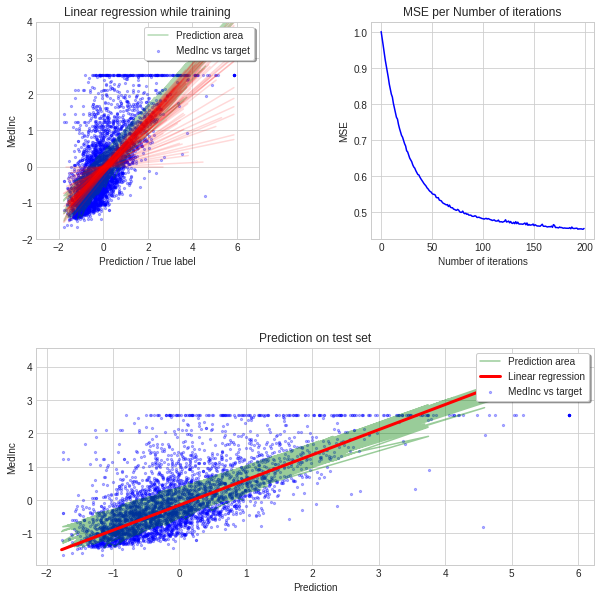


CROSS-VALIDATION
TEST_R2:  [0.51886459 0.4209813  0.51590369 0.4086027  0.57762176]
TRAIN_R2:  [0.53530511 0.58262348 0.55158279 0.5646529  0.52959923] 

TEST_MSE:  [0.38817191 0.50901415 0.5229899  0.52106036 0.46222216]
TRAIN_MSE:  [0.47093535 0.42821338 0.43037143 0.44270255 0.45525656] 



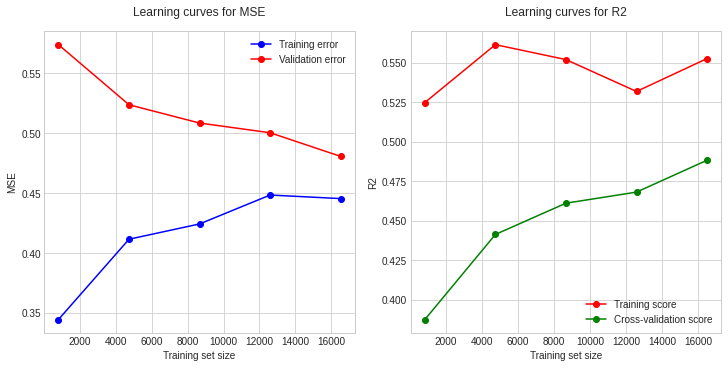

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.395757476715232
R2:  0.5927346162032145
Bias =  [-0.00227411]
Plots



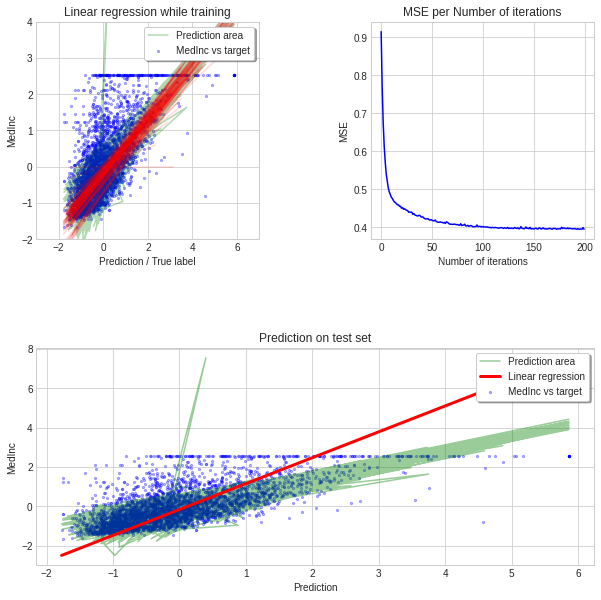


CROSS-VALIDATION
TEST_R2:  [0.55499061 0.46782794 0.55137866 0.53317125 0.65730988]
TRAIN_R2:  [0.59559331 0.63314662 0.61061058 0.61028509 0.58353987] 

TEST_MSE:  [0.35902605 0.46783136 0.48466478 0.41130718 0.37501687]
TRAIN_MSE:  [0.40983753 0.37637844 0.37371911 0.39629938 0.4030525 ] 



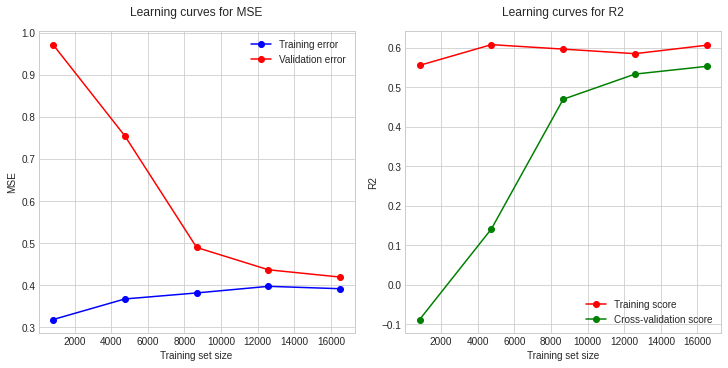

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.3968446193670377
R2:  0.5916158614218663
Bias =  [-0.00174585]
Plots



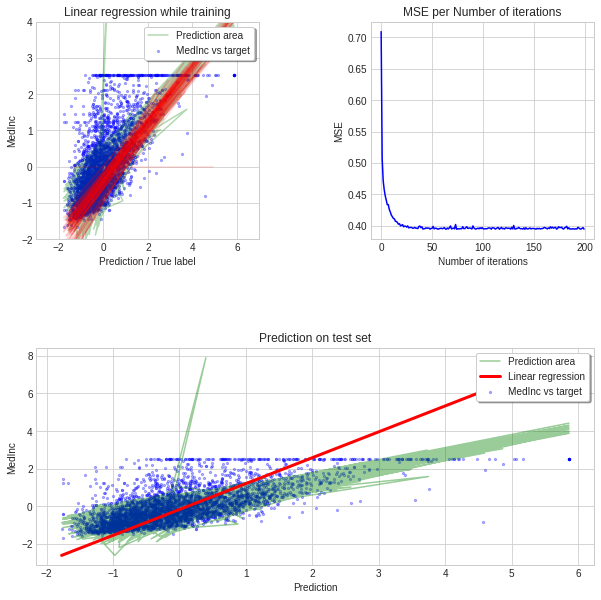


CROSS-VALIDATION
TEST_R2:  [0.54803456 0.46805615 0.5457916  0.53655103 0.66327915]
TRAIN_R2:  [0.59599326 0.63293145 0.61034347 0.61056569 0.58310234] 

TEST_MSE:  [0.36463807 0.46763074 0.49070071 0.40832937 0.36848451]
TRAIN_MSE:  [0.40943221 0.3765992  0.37397547 0.39601404 0.40347595] 



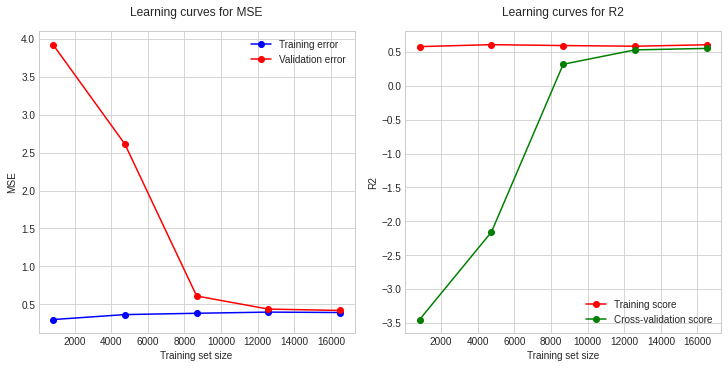

------------------------------------------------------------------------------------


In [ ]:
learning_rates_list = [0.001,0.01,0.1,0.5]
epochs = 200
batches = [5,30,50,100]
GridSearch(MiniBatchGradientDescent,data,target.reshape(-1,1),X_train, y_train,X_test, y_test,learning_rates_list,epochs,batches)

#### Mini-Batch gradient descent __remarks__

* __Overfitting__

  No overfitting in these tests (except from learning rate 0.5 that may occur some)
 

* __Underfitting__

 I notice again that small learning rate causes underfitting. In mini-batch in contrast with the others, has a weak impact because of the selection of "batches", but still, algorithm performance is affected. Underfitting noticed from high trainning and testing errors (from learning curves and cross-validation).

* __Good fit__

 Mini-batch has obviously the best performance between these three variations of grdient descent. This was expected from the start. I can see that even bad selection of learning curve hasn't great impact on performnce, in comparison with stochastic and batch. Also, as batches increase in size I see gradient descent converging faster with less epochs but with a little more execution time.Finally,:
 - Learning rates in [0.001,0.1] have good results.
 - Batch size selection affects mostly the number of iterations that algorithm needs to converge.
 - Mini-Batch converges in most of the tested situations.   

## Comparison between algorithms
---

Overall, taking into considaration the time running, convergence and scores we can see that Mini-batch GD has the best average performance with the smallest costs. Also,because of the California Housing datas nature, Batch  GD has also a very good performance, but this is partialy caused of the small size of the data that allows BGD to make all the calculations without a great cost. 

# References
---

* ML | Mini-Batch Gradient Descent with Python [Link](https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/)
* Gradient Descent in Python [Link](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)
* Learning Curves for Machine Learning in Python [Link](https://www.dataquest.io/blog/learning-curves-machine-learning/)
* Overfitting, bias-variance and learning curves [Link](https://rmartinshort.jimdofree.com/2019/02/17/overfitting-bias-variance-and-leaning-curves/)
* Machine Learning 1 - Regression, Gradient Descent [Link](https://www.kaggle.com/fengdanye/machine-learning-1-regression-gradient-descent)
* Simple SGD implementation in Python for Linear Regression on Boston Housing Data [Link](https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1)